In [1]:
# Import all the Libraries

import pandas as pd
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from google.colab import files
from pandas import Series

Using TensorFlow backend.


In [13]:
data = files.upload()
dataset = pd.read_csv('vanilla_RNN_v1.csv')

Saving vanilla_RNN_v1.csv to vanilla_RNN_v1 (4).csv


In [14]:
# Seed
np.random.seed(7)
dataset

,runs
0,0
1,1
2,1
3,2
4,2
5,6
6,6
7,10
8,11
9,11


In [15]:
dataframe = dataset.values
dataframe.astype('float32')

array([[  0.],
       [  1.],
       [  1.],
       ...,
       [209.],
       [210.],
       [211.]], dtype=float32)

In [16]:
# Normalize the dataset between 0 to 1
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataframe)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [17]:
dataset

array([[0.        ],
       [0.00225225],
       [0.00225225],
       ...,
       [0.47072072],
       [0.47297297],
       [0.47522523]])

In [0]:
# Split into train and test
train_size = int(len(dataset) * 0.67)
test_size = len(dataset)-train_size

In [0]:
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


In [0]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [0]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [22]:

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print(trainX[0:5])

[[[0.        ]]

 [[0.00225225]]

 [[0.00225225]]

 [[0.0045045 ]]

 [[0.0045045 ]]]


In [24]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=5, batch_size=32, verbose=2)

Epoch 1/5
 - 38s - loss: 0.0044
Epoch 2/5
 - 37s - loss: 0.0012
Epoch 3/5
 - 37s - loss: 0.0012
Epoch 4/5
 - 37s - loss: 0.0012
Epoch 5/5
 - 37s - loss: 0.0012


In [25]:
# Import Math and Mean_Squared_error
import math
from sklearn.metrics import mean_squared_error

# Make Predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 15.01 RMSE
Test Score: 14.81 RMSE


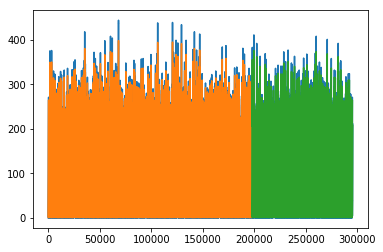

In [26]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [0]:
model.save('vanilla_RNN_v1_5epochs.h5')

In [0]:
files.download('vanilla_RNN_v1_5epochs.h5')

In [30]:
trainX

array([[[0.        ]],

       [[0.00225225]],

       [[0.00225225]],

       ...,

       [[0.45720721]],

       [[0.45720721]],

       [[0.45945946]]])

In [36]:
plt.plot(history.history['loss'], label='train')

NameError: ignored